# <font color=#3A86FF>Données nutritionnelles - Exploration </font>

## Sommaire

* [Chargement des donnees](#Chargement-des-donnees)
* [ACP](#ACP)
    * [Préparation des données](#Preparation-des-donnees)
    * [Centrage et réduction](#Centrage-et-reduction)
    * [Calcul des composantes principales](#Calcul-des-composantes-principales)
    * [Eboulis des valeurs propres](#Eboulis-des-valeurs-propres)
    * [Cercle des corrélations](#Cercle-des-correlations)
    * [Choix du plan factoriel](#Choix-du-plan-factoriel)
    * [Projection des individus](#Projection-des-individus)   
* [Analyses univariees](#Analyses-univariees)
    * [Tendances centrales](#Tendances-centrales)
    * [Boxplots](#Boxplots)
    * [Histogrammes](#Histogrammes)
* [Conclusion](#Conclusion) 

## <font color=#FB5607>Chargement des donnees</font>

In [1]:
import pandas as pd
import time

now = time.time()
df = pd.read_csv("products_clean.csv", encoding="utf-8",sep=",", low_memory=False)

In [2]:
df.head()

,states,brands,quantity,states_tags,categories,countries_tags,states_fr,main_category,creator,brands_tags,...,countries_fr,additives_n,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,nutrition-score-fr_100g,sugars_100g,proteins_100g
0,"en:to-be-completed, en:nutrition-facts-to-be-c...",Ferme t'y R'nao,1kg,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,en:france,"A compléter,Informations nutritionnelles à com...",NaN,openfoodfacts-contributors,ferme-t-y-r-nao,...,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"en:to-be-completed, en:nutrition-facts-complet...",NaN,NaN,"en:to-be-completed,en:nutrition-facts-complete...",NaN,en:united-states,"A compléter,Informations nutritionnelles compl...",NaN,usda-ndb-import,NaN,...,États-Unis,0.0,2243.0,28.57,28.57,0.018,64.29,14.0,14.29,3.57
2,"en:to-be-completed, en:nutrition-facts-complet...",Torn & Glasser,NaN,"en:to-be-completed,en:nutrition-facts-complete...",NaN,en:united-states,"A compléter,Informations nutritionnelles compl...",NaN,usda-ndb-import,torn-glasser,...,États-Unis,0.0,1941.0,17.86,0.00,0.000,60.71,0.0,17.86,17.86
3,"en:to-be-completed, en:nutrition-facts-complet...",Grizzlies,NaN,"en:to-be-completed,en:nutrition-facts-complete...",NaN,en:united-states,"A compléter,Informations nutritionnelles compl...",NaN,usda-ndb-import,grizzlies,...,États-Unis,0.0,2540.0,57.14,5.36,NaN,17.86,12.0,3.57,17.86
4,"en:to-be-completed, en:nutrition-facts-complet...",Bob's Red Mill,NaN,"en:to-be-completed,en:nutrition-facts-complete...",NaN,en:united-states,"A compléter,Informations nutritionnelles compl...",NaN,usda-ndb-import,bob-s-red-mill,...,États-Unis,0.0,1552.0,1.43,NaN,NaN,77.14,NaN,NaN,8.57


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   states                   320726 non-null  object 
 1   brands                   292360 non-null  object 
 2   quantity                 104819 non-null  object 
 3   states_tags              320726 non-null  object 
 4   categories               84410 non-null   object 
 5   countries_tags           320492 non-null  object 
 6   states_fr                320726 non-null  object 
 7   main_category            84366 non-null   object 
 8   creator                  320770 non-null  object 
 9   brands_tags              292352 non-null  object 
 10  additives_fr             154680 non-null  object 
 11  countries                320492 non-null  object 
 12  categories_tags          84389 non-null   object 
 13  categories_fr            84411 non-null   object 
 14  main

In [4]:
import numpy as np

# identification des colonnes numériques et qualitatives
colonnesNum=df.select_dtypes(np.number).columns.tolist()
colonnesQual=df.select_dtypes('O').columns.tolist()

## <font color=#FB5607>ACP</font>

### Preparation des donnees

In [5]:
# filtrage sur les variables quantitatives
dataPCA=df[colonnesNum].dropna()
nomsIndividus=df.iloc[dataPCA.index,df.columns.get_loc('product_name')] # Individus
nutritionGrade=df.iloc[dataPCA.index,df.columns.get_loc('nutrition_grade_fr')] # note alphabetique de nutrition par individu
variables=dataPCA.columns # Variables
X=dataPCA.values # Valeurs

In [6]:
dataPCA.sample(5)

,additives_n,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,nutrition-score-fr_100g,sugars_100g,proteins_100g
68826,0.0,406.0,0.00,0.00,0.0,17.70,-4.0,0.88,5.31
57733,1.0,142.0,0.00,0.00,0.0,9.04,1.0,8.47,0.00
137050,2.0,1230.0,15.08,6.35,0.0,39.68,13.0,19.84,1.59
13472,2.0,393.0,4.71,1.18,0.0,4.71,-8.0,1.18,9.41
122213,0.0,1510.0,13.89,2.78,0.0,55.56,0.0,19.44,13.89


In [7]:
nutritionGrade

1         d
2         b
65        c
70        c
77        c
         ..
320664    c
320665    b
320738    d
320742    a
320768    b
Name: nutrition_grade_fr, Length: 136607, dtype: object

In [8]:
len(variables)

9

In [9]:
nomsIndividus

1                            Banana Chips Sweetened (Whole)
2                                                   Peanuts
65                                      Tricolor Tortellini
70                                     10-Grain Pancake Mix
77                               Granola Cranberry And Acai
                                ...                        
320664                      Chipotle Peppers In Adobo Sauce
320665                                          Dal Makhani
320738                                        Organic Z Bar
320742                                      Natural Cassava
320768    Mint Melange Tea A Blend Of Peppermint, Lemon ...
Name: product_name, Length: 136607, dtype: object

### Centrage et reduction

In [10]:
from sklearn import preprocessing
from sklearn import decomposition

In [11]:
centreReduit = preprocessing.StandardScaler().fit(X)
XCentreReduit = centreReduit.transform(X)
XCentreReduit.shape

(136607, 9)

### Calcul des composantes principales

In [12]:
n_comp=9 # n_comp <= nombre de variables
pca = decomposition.PCA(n_components=n_comp)
pca.fit(XCentreReduit)

PCA(n_components=9)

### Eboulis des valeurs propres

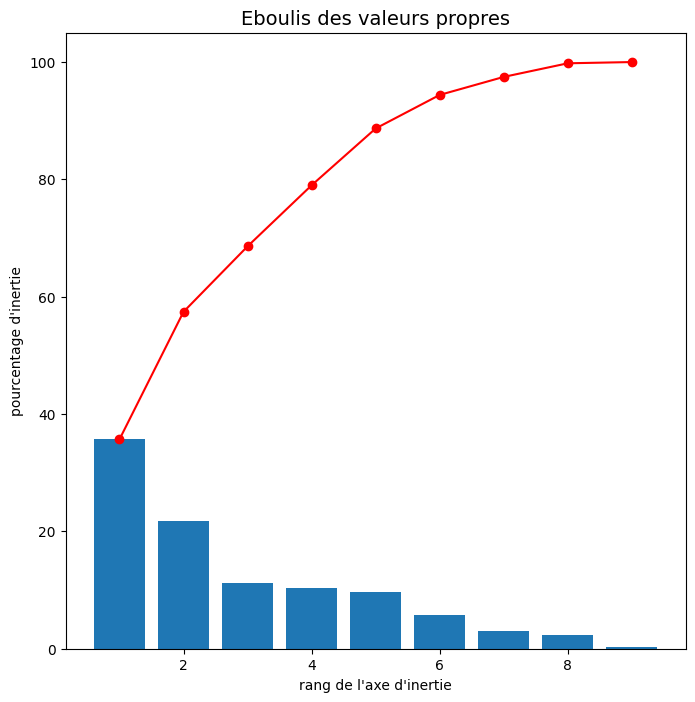

In [13]:
from matplotlib import pyplot as plt

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (8,8)

vectVarianceExpliquee = pca.explained_variance_ratio_*100 # renvoie les variences expliquées pour chacune des dimensions
plt.bar(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee)
plt.plot(np.arange(len(vectVarianceExpliquee))+1, vectVarianceExpliquee.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres",fontsize=14,fontweight='normal')
plt.show()

In [14]:
composantesPrincipales = pca.components_ # triés par variance expliquée

### Choix du plan factoriel

In [15]:
# Selection du plan Factoriel
#dimension 1
d1=0
#dimension 2
d2=1

### Cercle des correlations

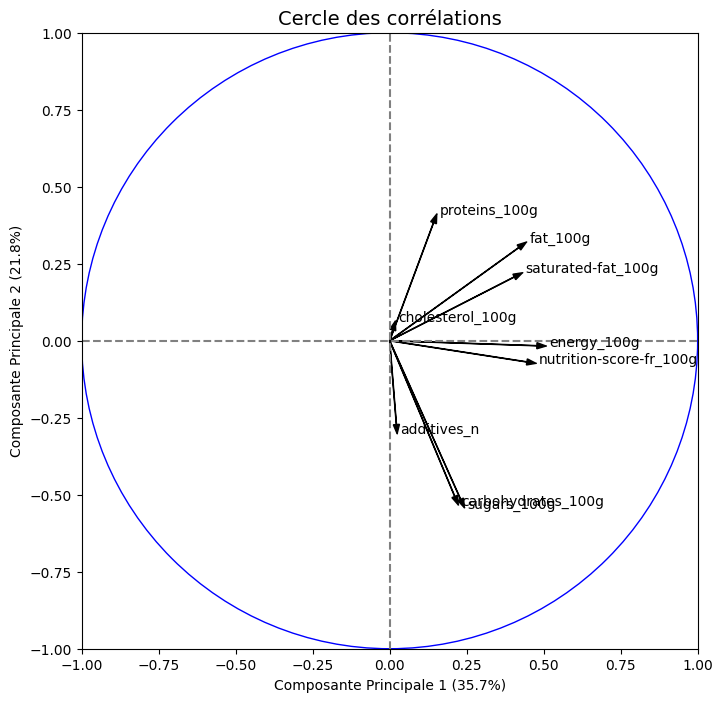

In [16]:
from matplotlib import pyplot as plt
import matplotlib as mpl

plt.style.use('default')
# taille du schema
plt.rcParams["figure.figsize"] = (8,8)

fig, ax = plt.subplots()

# configuration de la bordure
plt.xlim(-1,1)
plt.ylim(-1,1)

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# libelles des axes
plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Cercle des corrélations',color="black",fontsize=14,fontweight='normal')
# afficher le cercle
cercle = plt.Circle((0,0),radius=1, color='b', fill=False)
ax.set_aspect(1)
ax.add_patch(cercle)


#placement des étiquettes des p variables + fleches (partant du centre vers les points projetés)
for i in range(len(variables)):
    plt.annotate(variables[i],xy =(composantesPrincipales[d1][i],composantesPrincipales[d2][i]),xytext =(composantesPrincipales[d1][i]+0.01,composantesPrincipales[d2][i]),arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3")) 
    plt.arrow(0,0,composantesPrincipales[d1][i],composantesPrincipales[d2][i].astype(np.float),length_includes_head=True,head_width=0.02, head_length=0.03,color="black")

### Projection des individus

In [17]:
# Projection des individus sur les composantes principales
XProjete = pca.transform(XCentreReduit)
print(f"dim Projeté:{XProjete.shape}- dim Origine:{XCentreReduit.shape}")

dim Projeté:(136607, 9)- dim Origine:(136607, 9)


In [18]:
# preparation de la palette de couleur qui reprend les codes couleurs hexa du logo nutriscore
custom_palette = {
'd': '#E08530',#Orange
 'c': '#F6CB45',#Jaune
 'e': '#D44B29',#Rouge
 'a': '#387E47',#Vert foncé
 'b': '#91B849' #Vert   
}
custom_palette['a']

'#387E47'

In [19]:
list(custom_palette.values())

['#E08530', '#F6CB45', '#D44B29', '#387E47', '#91B849']

In [20]:
list(custom_palette.keys())

['d', 'c', 'e', 'a', 'b']

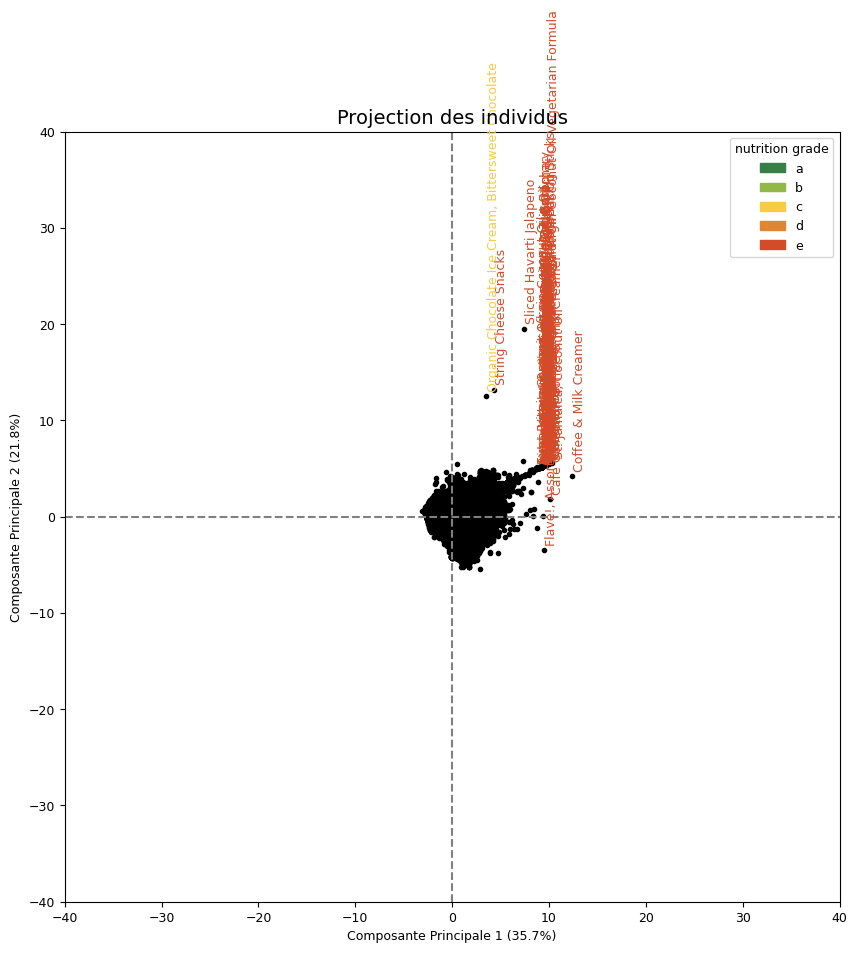

In [21]:
# visualisation
from matplotlib import pyplot as plt

# taille du graphique
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams['font.size'] = '9.0'

# configuration de la bordure
plt.xlim(-40,40)
plt.ylim(-40,40)

# affichage des lignes horizontales et verticales
plt.plot([-40, 40], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-40, 40], color='grey', ls='--')

plt.xlabel('Composante Principale {} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
plt.ylabel('Composante Principale {} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
plt.title('Projection des individus',fontsize=14,fontweight='normal')



# representer le nuage projeté sur le 1er plan factoriel (composé des 2 premieres composantes principales 0 et 1)
plt.scatter(XProjete[:,d1],XProjete[:,d2],marker=".",color="black")

for i in range(len(nomsIndividus)):   # nombre d'individus
    
    p=np.array([XProjete[i,d1],XProjete[i,d2]])

    color=nutritionGrade.values[i]

    # on utilise la distance euclidienne pour n'afficher les labels que pour les individus loin du centre
    distance= np.linalg.norm(p-np.array([0,0]))

    if distance>10:
        label=nomsIndividus.values[i]
        #print(f"label[{i}]:{label} | test:{not(pd.isnull(label))} | color:{color}") # debug
        if not pd.isnull(label):
            plt.text(XProjete[i,d1]+0.1, XProjete[i,d2]+0.8, label ,rotation=90,color=custom_palette[color])
    #plt.annotate(nomsIndividus.values[i],xy =(XProjete[i,0],XProjete[i,1]),xytext =(XProjete[i,0],XProjete[i,1]))

import matplotlib.patches as mpatches

a_patch = mpatches.Patch(color=custom_palette['a'], label='a')
b_patch = mpatches.Patch(color=custom_palette['b'], label='b')
c_patch = mpatches.Patch(color=custom_palette['c'], label='c')
d_patch = mpatches.Patch(color=custom_palette['d'], label='d')
e_patch = mpatches.Patch(color=custom_palette['e'], label='e')


plt.legend(title="nutrition grade",handles=[a_patch, b_patch, c_patch, d_patch, e_patch])

#import os
#os.system('say "jai fini de dessiner"')

Observations:
* sur l'axe du nutrition score, la note de nutrition ne semble pas correlee
* la composante energy / nutrition_score explique toute seule une composante
* sugars et carbohydrates (glucides) expliquent fortement l'axe vertical negatif
* le gras explique modéremment l'axe vertical positif en opposition avec les glucides/sucres

In [22]:
df.groupby("nutrition_grade_fr").agg({
    "nutrition-score-fr_100g":"mean"
})

,nutrition-score-fr_100g
nutrition_grade_fr,
a,-3.407644
b,0.906673
c,6.367561
d,14.066934
e,21.962305


Calculons le coefficient de corrélation (Pearson) entre le "nutrition score" et la "note de nutrition"

In [23]:
# conversion numerique de la note alphabetique de nutrition
gradeNotationMapper={"a":5,"b":4,"c":3,"d":2,"e":1}
nutritionNote=nutritionGrade.replace(gradeNotationMapper)

In [24]:
# coeffiction de correlation Pearson entre le nutrition score et la note "numerique" de nutrition
dataPCA['nutrition-score-fr_100g'].corr(nutritionNote)

-0.9635870278631248

=> le nutrition-score-fr_100g varie à l'opposée de la note de nutrition: plus le nutrition score est elevé plus la note de nutrition est basse

## <font color=#FB5607>Analyses univariees</font>

### Tendances centrales

In [25]:
# echantillon de données numériques
df[colonnesNum].sample(10)

,additives_n,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,nutrition-score-fr_100g,sugars_100g,proteins_100g
210335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292934,NaN,253.0,0.50,0.50,NaN,13.00,0.0,11.00,0.50
168661,NaN,753.0,50.00,1.00,0.000,21.88,-3.0,1.00,7.00
79889,2.0,1469.0,10.53,4.39,0.018,61.40,22.0,45.61,3.51
204208,NaN,559.0,9.50,3.00,NaN,10.00,7.0,2.80,1.50
44230,0.0,297.0,0.00,0.00,0.000,14.29,4.0,14.29,0.00
4571,1.0,837.0,20.00,6.67,0.000,0.00,18.0,0.00,0.00
271195,NaN,406.0,NaN,0.20,NaN,NaN,-2.0,4.90,4.00
148290,2.0,866.0,10.71,8.57,0.021,27.86,14.0,20.00,1.43
289459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# tableau de tendances (mediane, moyenne, ecart-type, valeurs uniques)
df[colonnesNum].agg(['size','median','mean', 'std','nunique']).round(0)

,additives_n,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,nutrition-score-fr_100g,sugars_100g,proteins_100g
size,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0,320772.0
median,1.0,1100.0,5.0,2.0,0.0,21.0,10.0,6.0,5.0
mean,2.0,1142.0,13.0,5.0,0.0,32.0,9.0,16.0,7.0
std,3.0,6447.0,18.0,8.0,0.0,30.0,9.0,22.0,8.0
nunique,31.0,3997.0,3378.0,2197.0,537.0,5416.0,55.0,4068.0,2503.0


### Boxplots

In [27]:
from helpers import *

# exclusion des outliers sur les variables quantitatives
for name in colonnesNum:
    mask=maskOutliers(df[name])
    df.loc[mask,name]=0

additives_n
energy_100g
fat_100g
saturated-fat_100g
cholesterol_100g
carbohydrates_100g
nutrition-score-fr_100g
sugars_100g
proteins_100g


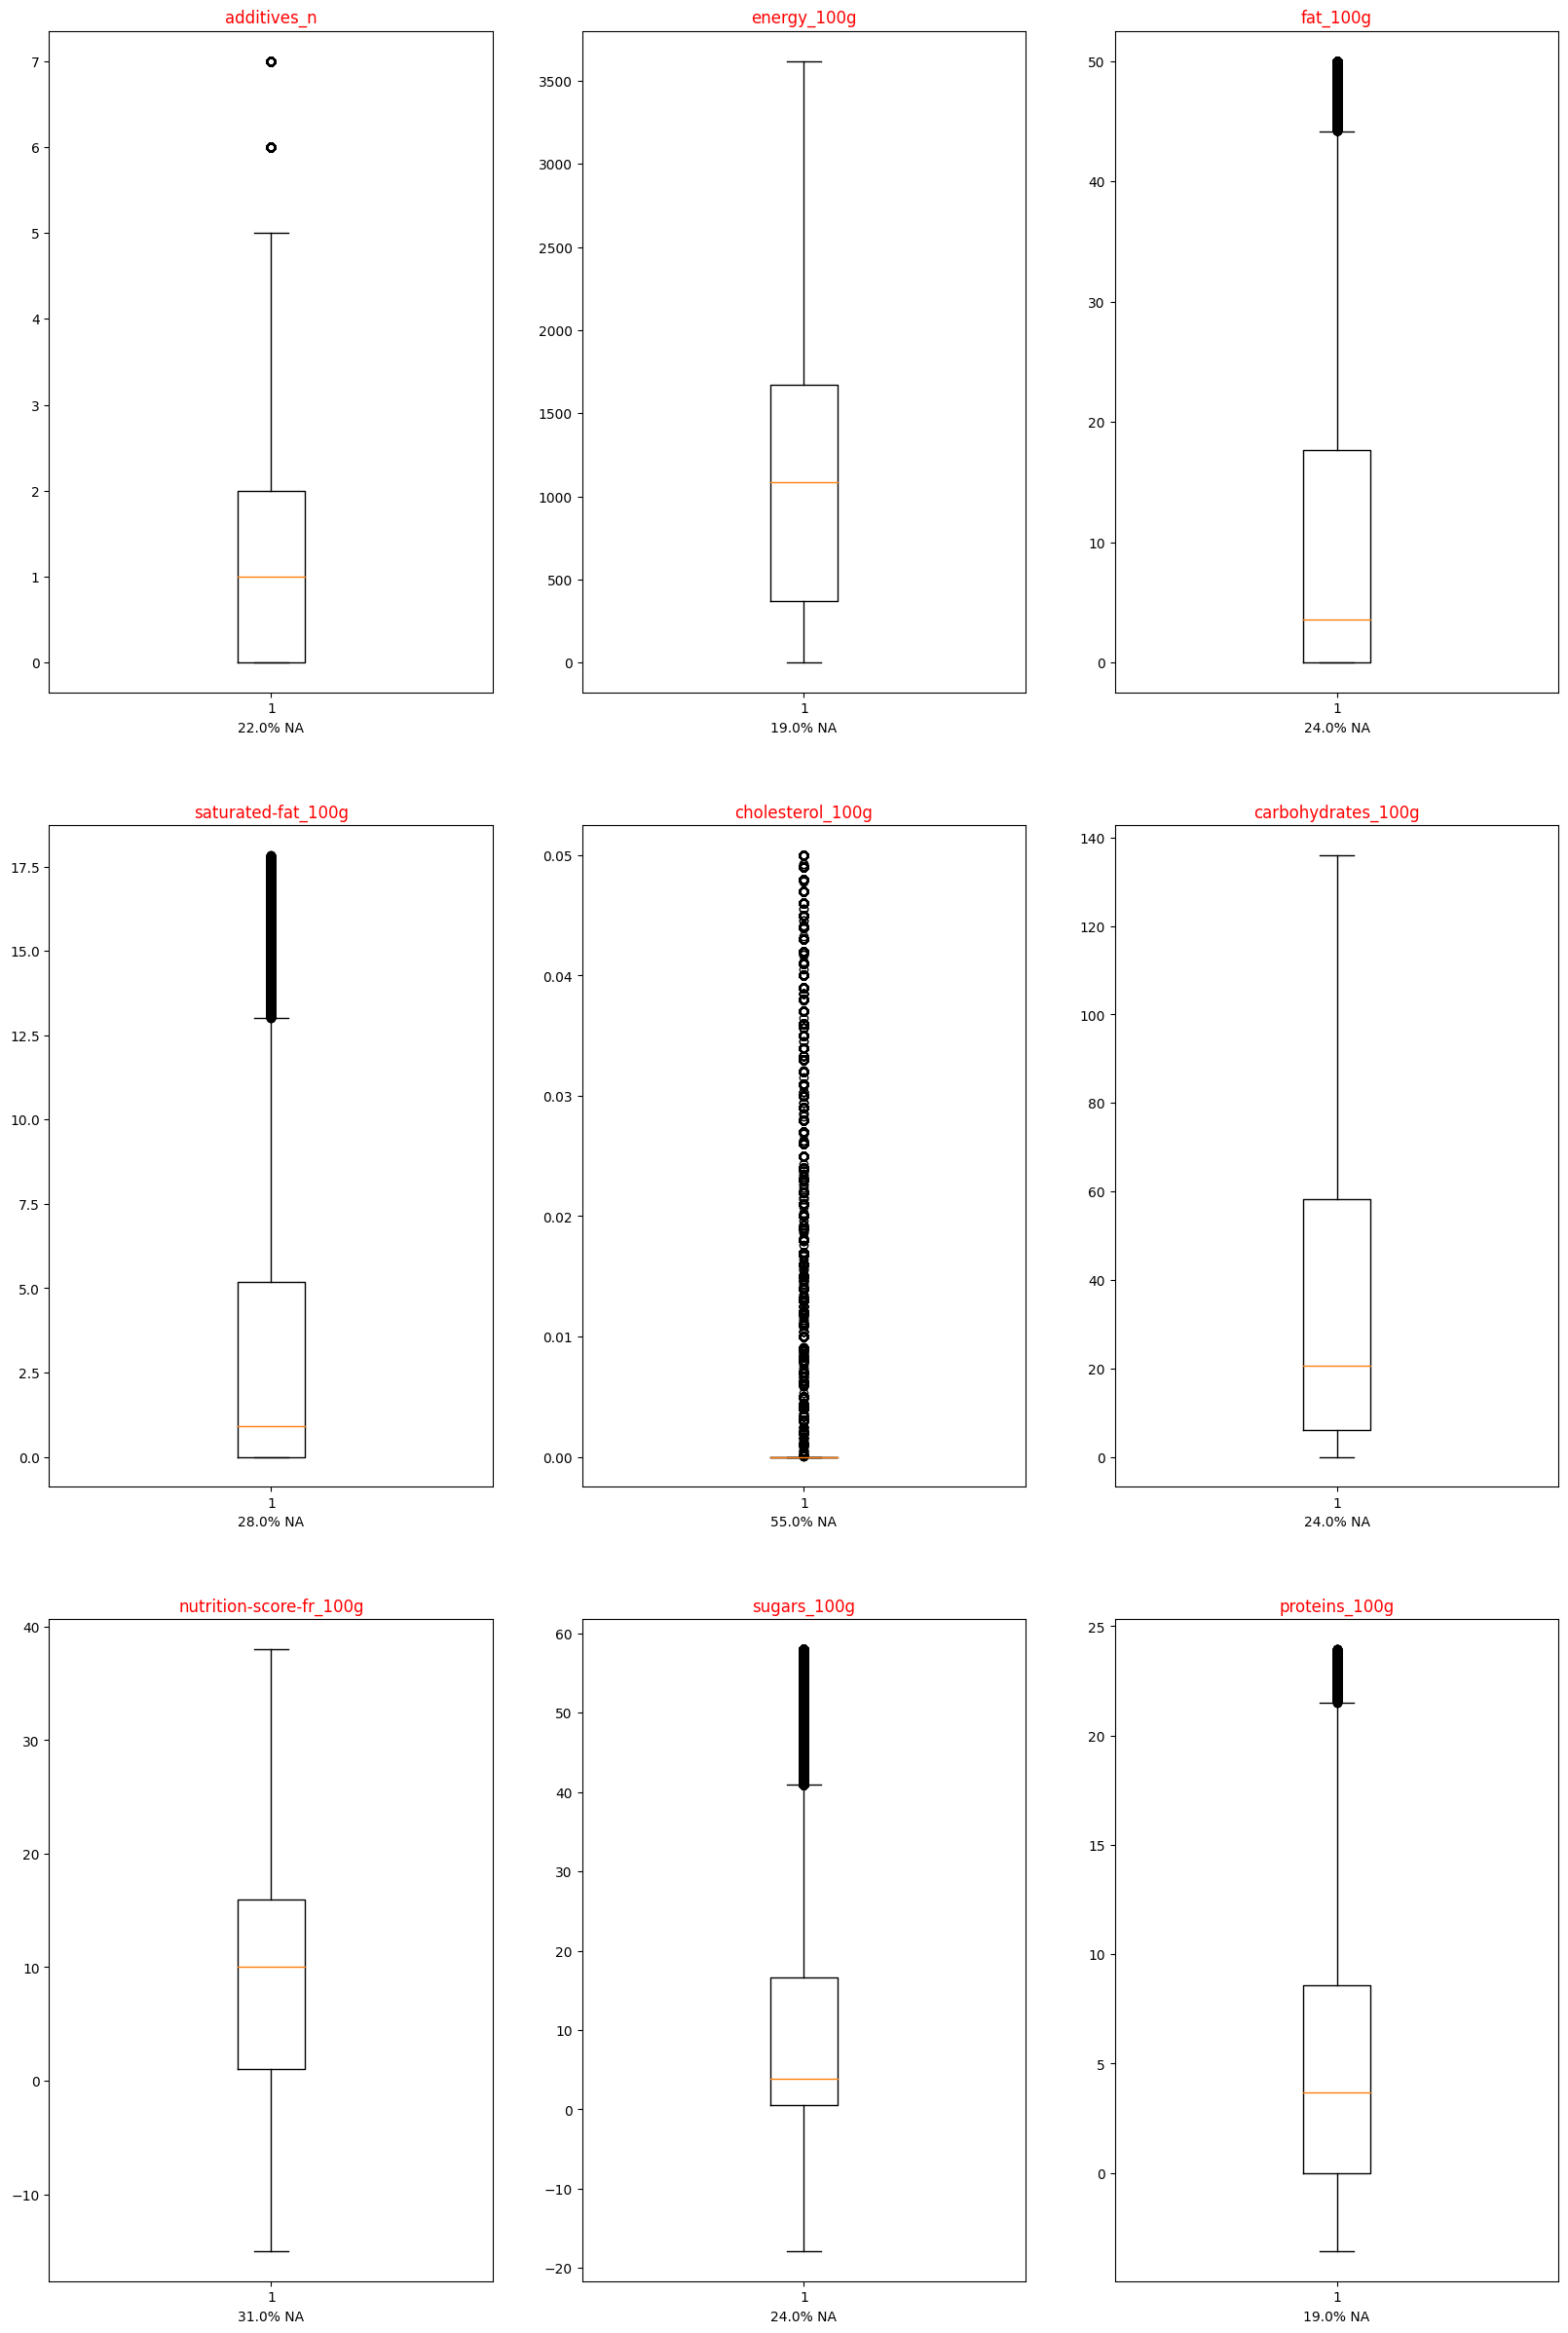

In [28]:
from matplotlib import pyplot as plt

plt.rcdefaults()
plt.rcParams["figure.figsize"] = (100,40)

fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20,30))
axes=axes.flatten()

i=0
for x in colonnesNum:
        print(str(x)) #debug
        # on dessine le boxplot en excluant les valeurs manquantes pour chaque variable quantitative
        axes[i].boxplot(df[x].dropna())
        axes[i].set_title(x,color='red')
        axes[i].set_xlabel(str(round(100*df[x].isna().sum(axis=0)/len(df[x]),0))+'% NA')
        i+=1

### Histogrammes

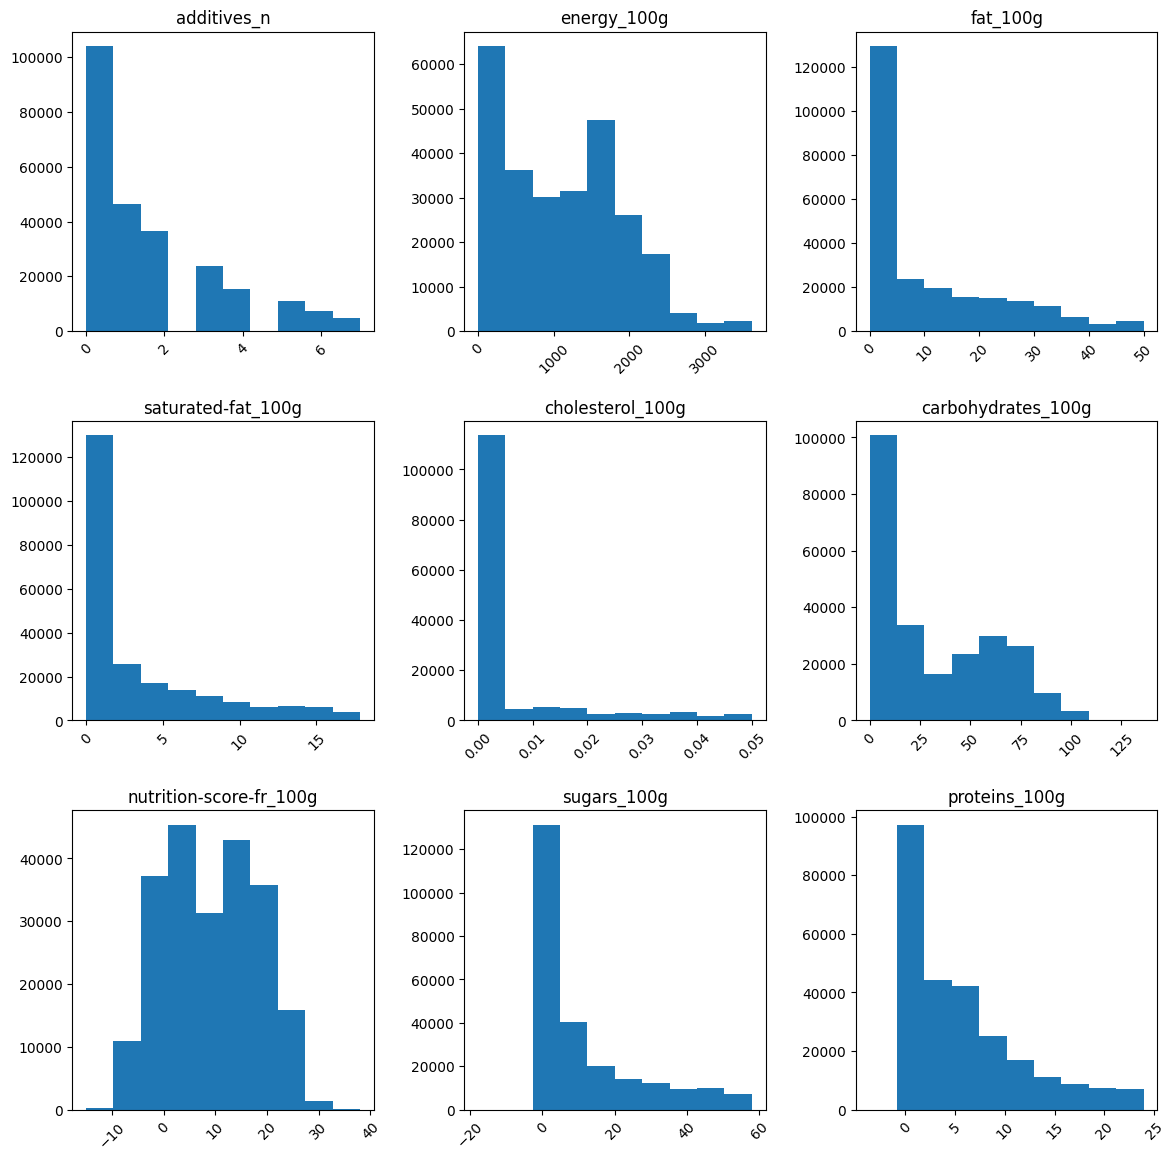

In [29]:
plt.rcParams["axes.grid"] = False
df.hist(figsize=(14,14), xrot=45,grid=False)
plt.show()

On remarque une distribution bimodale sur le nutrition-score-fr_100g
-> on aurant potentiellement deux groupes de produits (ceux avec des scores autour de 0 et ceux autour de 15)

In [30]:
time.time() - now

17.33107280731201

## <font color=#FB5607>Conclusion</font>

On peut distinguer 3 axes de definition d'un produit alimentaire:
* les aliments riches en protéines
* les aliments riches en sucre lent/rapide
* les aliments energetiques